In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from urllib.parse import urlparse
from re import findall
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score,train_test_split

from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,recall_score,precision_score,roc_curve

import plotly.graph_objects as go

C:\Users\11811\AppData\Local\Temp\ipykernel_840\1386797836.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("4Dataset.csv")

In [3]:
df.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [4]:
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df.shape


(450176, 3)

In [6]:

summary_stats = df.describe()
print(summary_stats)


              result
count  450176.000000
mean        0.231994
std         0.422105
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000


In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450176 non-null  object
 1   label   450176 non-null  object
 2   result  450176 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.3+ MB


*CHECKING THE MISSING VALUE*

In [8]:
df.isnull().sum()

url       0
label     0
result    0
dtype: int64

In [9]:
# Bar chart for 'type' column
label_counts = df['label'].value_counts()
fig = go.Figure(data=[go.Bar(x=label_counts.index, y=label_counts.values)])
fig.update_layout(title='Frequency of URL Types',
                  xaxis_title='URL Type',
                  yaxis_title='Count',
                  template='plotly_dark',
                  font=dict(color='white'),
                  showlegend=False)
fig.show()

In [10]:


url_type_counts = df['label'].value_counts()

fig = go.Figure(data=[go.Pie(labels=url_type_counts.index, values=url_type_counts.values)])
fig.update_layout(
    title='Distribution of URL Types',
    template='plotly_dark',
    font=dict(color='white'),
    showlegend=True
)

fig.show()


*Balancing Data*


In [11]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd


X = df.drop(['label'], axis=1)  
y = df['label'] 

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['label'] = y_resampled

print(df_balanced['label'].value_counts())


label
benign       104438
malicious    104438
Name: count, dtype: int64


In [12]:
label_counts = df_balanced['label'].value_counts()
fig = go.Figure(data=[go.Bar(x=label_counts.index, y=label_counts.values)])
fig.update_layout(title='Frequency of URL Types (Undersampling)',
                  xaxis_title='URL Type',
                  yaxis_title='Count',
                  template='plotly_dark',
                  font=dict(color='white'),
                  showlegend=False)
fig.show()

In [13]:
df_balanced

,url,result,label
328491,https://www.yelp.com/biz/stone-mountain-clay-a...,0,benign
60800,https://www.ivanhill5478.blogspot.com/,0,benign
191230,https://www.facebook.com/people/Reggie-Walton/...,0,benign
49392,https://www.freepages.genealogy.rootsweb.ances...,0,benign
240956,https://www.manchester.edu/Athletics/basketbal...,0,benign
...,...,...,...
450171,http://ecct-it.com/docmmmnn/aptgd/index.php,1,malicious
450172,http://faboleena.com/js/infortis/jquery/plugin...,1,malicious
450173,http://faboleena.com/js/infortis/jquery/plugin...,1,malicious
450174,http://atualizapj.com/,1,malicious


In [14]:
df_balanced.isnull().sum()

url       0
result    0
label     0
dtype: int64

In [15]:

summary_stats = df_balanced.describe()
print(summary_stats)

              result
count  208876.000000
mean        0.500000
std         0.500001
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000


*Data Preprocessing*

**Length Features**

In [16]:
from urllib.parse import urlparse
from tld import get_tld
import os.path

In [17]:
df_balanced['url_length'] = df_balanced['url'].apply(lambda i: len(str(i)))
#URL length

In [18]:
df_balanced['hostname_length'] = df_balanced['url'].apply(lambda i: len(urlparse(i).netloc))
#HostName Length

In [19]:
df_balanced['path_length'] = df['url'].apply(lambda i: len(urlparse(i).path))
#path_length


In [20]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df_balanced['fd_length'] = df_balanced['url'].apply(lambda i: fd_length(i))

In [21]:
#Length of Top Level Domain
df_balanced['tld'] = df_balanced['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df_balanced['tld_length'] = df_balanced['tld'].apply(lambda i: tld_length(i))

In [22]:
df_balanced.head()

,url,result,label,url_length,hostname_length,path_length,fd_length,tld,tld_length
328491,https://www.yelp.com/biz/stone-mountain-clay-a...,0,benign,61,12,41,3,com,3
60800,https://www.ivanhill5478.blogspot.com/,0,benign,38,29,1,0,blogspot.com,12
191230,https://www.facebook.com/people/Reggie-Walton/...,0,benign,56,16,32,6,com,3
49392,https://www.freepages.genealogy.rootsweb.ances...,0,benign,79,45,26,8,com,3
240956,https://www.manchester.edu/Athletics/basketbal...,0,benign,61,18,35,9,edu,3


In [23]:
#remove the tld bcs its string
df_balanced = df_balanced.drop(columns="tld")


In [24]:
df_balanced.head()

,url,result,label,url_length,hostname_length,path_length,fd_length,tld_length
328491,https://www.yelp.com/biz/stone-mountain-clay-a...,0,benign,61,12,41,3,3
60800,https://www.ivanhill5478.blogspot.com/,0,benign,38,29,1,0,12
191230,https://www.facebook.com/people/Reggie-Walton/...,0,benign,56,16,32,6,3
49392,https://www.freepages.genealogy.rootsweb.ances...,0,benign,79,45,26,8,3
240956,https://www.manchester.edu/Athletics/basketbal...,0,benign,61,18,35,9,3


**Count Features**

In [25]:
from urllib.parse import urlparse

# Update feature names to be more descriptive and unique
df_balanced['-'] = df_balanced['url'].apply(lambda x: x.count('-'))
df_balanced['@'] = df_balanced['url'].apply(lambda x: x.count('@'))
df_balanced['?'] = df_balanced['url'].apply(lambda x: x.count('?'))
df_balanced['%'] = df_balanced['url'].apply(lambda x: x.count('%'))
df_balanced['dot'] = df_balanced['url'].apply(lambda x: x.count('.'))
df_balanced['='] = df_balanced['url'].apply(lambda x: x.count('='))
df_balanced['http'] = df_balanced['url'].apply(lambda x: x.count('http'))
df_balanced['https'] = df_balanced['url'].apply(lambda x: x.count('https'))
df_balanced['www'] = df_balanced['url'].apply(lambda x: x.count('www'))


def count_digits(url):
    return sum(c.isdigit() for c in url)

df_balanced['digit_count'] = df_balanced['url'].apply(count_digits)


def count_letters(url):
    return sum(c.isalpha() for c in url)

df_balanced['letter_count'] = df_balanced['url'].apply(count_letters)


def directory_count(url):
    path = urlparse(url).path
    return path.count('/')

df_balanced['directory_count'] = df_balanced['url'].apply(directory_count)


In [26]:
df_balanced.head()

,url,result,label,url_length,hostname_length,path_length,fd_length,tld_length,-,@,?,%,dot,=,http,https,www,digit_count,letter_count,directory_count
328491,https://www.yelp.com/biz/stone-mountain-clay-a...,0,benign,61,12,41,3,3,5,0,0,0,2,0,1,1,1,0,49,2
60800,https://www.ivanhill5478.blogspot.com/,0,benign,38,29,1,0,12,0,0,0,0,3,0,1,1,1,4,27,1
191230,https://www.facebook.com/people/Reggie-Walton/...,0,benign,56,16,32,6,3,1,0,0,0,2,0,1,1,1,10,37,3
49392,https://www.freepages.genealogy.rootsweb.ances...,0,benign,79,45,26,8,3,0,0,0,0,6,0,1,1,1,1,65,3
240956,https://www.manchester.edu/Athletics/basketbal...,0,benign,61,18,35,9,3,0,0,0,0,3,0,1,1,1,0,52,3


**Binary features**

In [27]:
import re

In [28]:
 #Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
df_balanced['use_of_ip'] = df_balanced['url'].apply(lambda i: having_ip_address(i))

def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
df_balanced['short_url'] = df_balanced['url'].apply(lambda i: shortening_service(i))

In [29]:
df_balanced.head()

,url,result,label,url_length,hostname_length,path_length,fd_length,tld_length,-,@,...,dot,=,http,https,www,digit_count,letter_count,directory_count,use_of_ip,short_url
328491,https://www.yelp.com/biz/stone-mountain-clay-a...,0,benign,61,12,41,3,3,5,0,...,2,0,1,1,1,0,49,2,1,1
60800,https://www.ivanhill5478.blogspot.com/,0,benign,38,29,1,0,12,0,0,...,3,0,1,1,1,4,27,1,1,-1
191230,https://www.facebook.com/people/Reggie-Walton/...,0,benign,56,16,32,6,3,1,0,...,2,0,1,1,1,10,37,3,1,1
49392,https://www.freepages.genealogy.rootsweb.ances...,0,benign,79,45,26,8,3,0,0,...,6,0,1,1,1,1,65,3,1,1
240956,https://www.manchester.edu/Athletics/basketbal...,0,benign,61,18,35,9,3,0,0,...,3,0,1,1,1,0,52,3,1,1


In [30]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208876 entries, 328491 to 450175
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   url              208876 non-null  object
 1   result           208876 non-null  int64 
 2   label            208876 non-null  object
 3   url_length       208876 non-null  int64 
 4   hostname_length  208876 non-null  int64 
 5   path_length      208876 non-null  int64 
 6   fd_length        208876 non-null  int64 
 7   tld_length       208876 non-null  int64 
 8   -                208876 non-null  int64 
 9   @                208876 non-null  int64 
 10  ?                208876 non-null  int64 
 11  %                208876 non-null  int64 
 12  dot              208876 non-null  int64 
 13  =                208876 non-null  int64 
 14  http             208876 non-null  int64 
 15  https            208876 non-null  int64 
 16  www              208876 non-null  int64 
 17  digit_coun

In [31]:
df_balanced.isnull().sum()

url                0
result             0
label              0
url_length         0
hostname_length    0
path_length        0
fd_length          0
tld_length         0
-                  0
@                  0
?                  0
%                  0
dot                0
=                  0
http               0
https              0
www                0
digit_count        0
letter_count       0
directory_count    0
use_of_ip          0
short_url          0
dtype: int64

*Data Visualization*

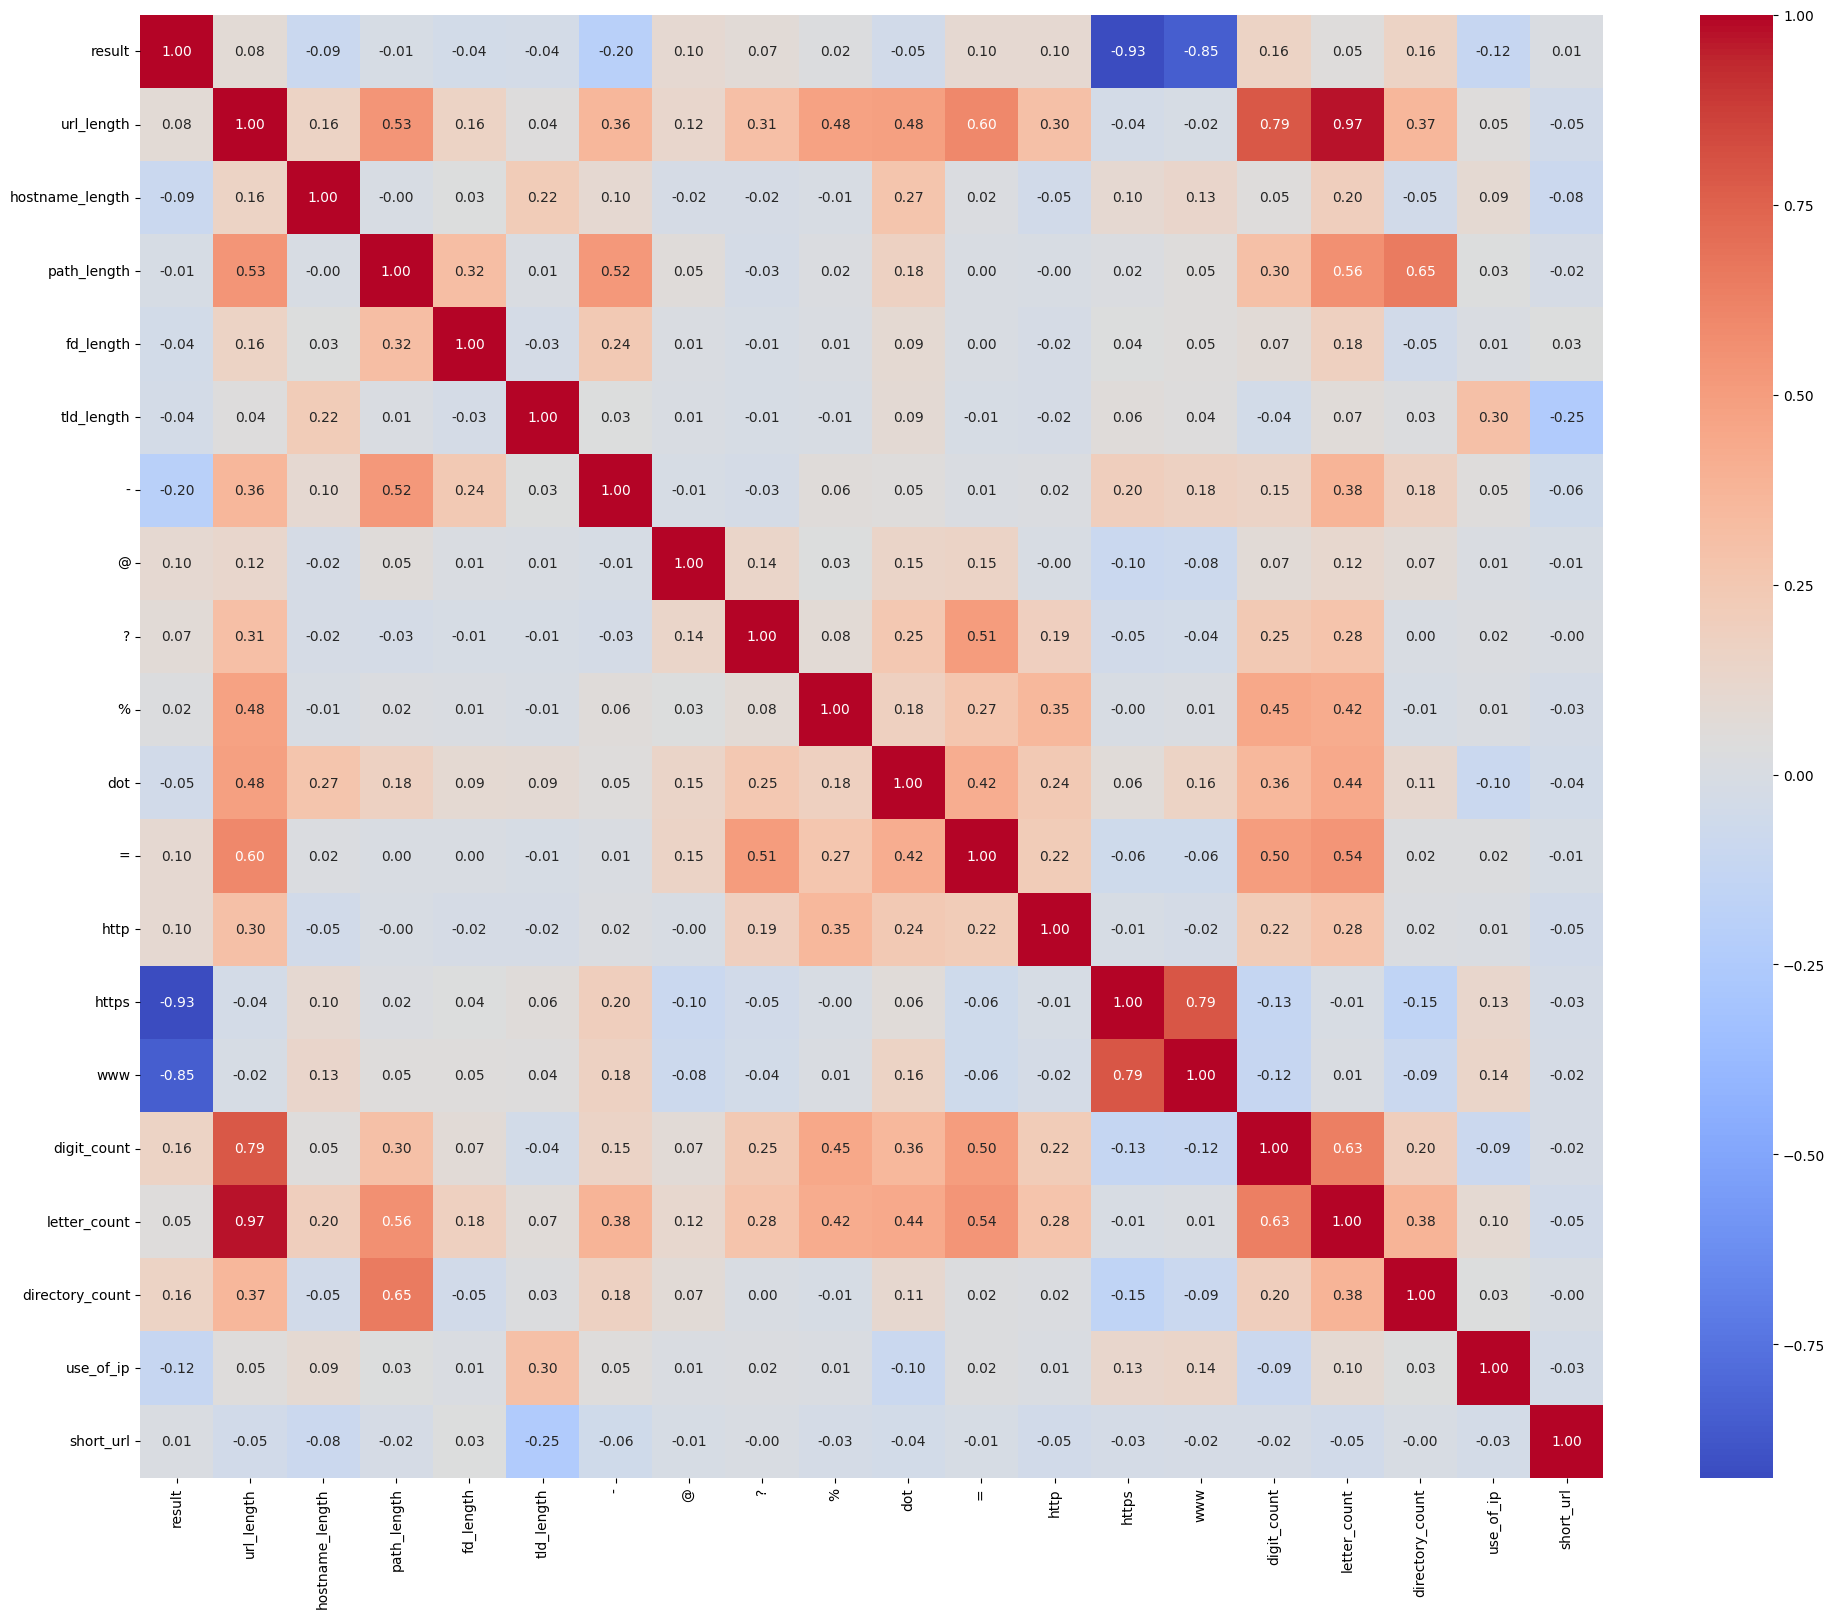

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df_balanced.select_dtypes(include=[np.number])
corrmat = numeric_df.corr()

f, ax = plt.subplots(figsize=(25, 19))
sns.heatmap(corrmat, square=True, annot=True, annot_kws={'size': 10}, fmt='.2f', cmap='coolwarm')
plt.show()


C:\Users\11811\AppData\Local\Temp\ipykernel_840\1525768087.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




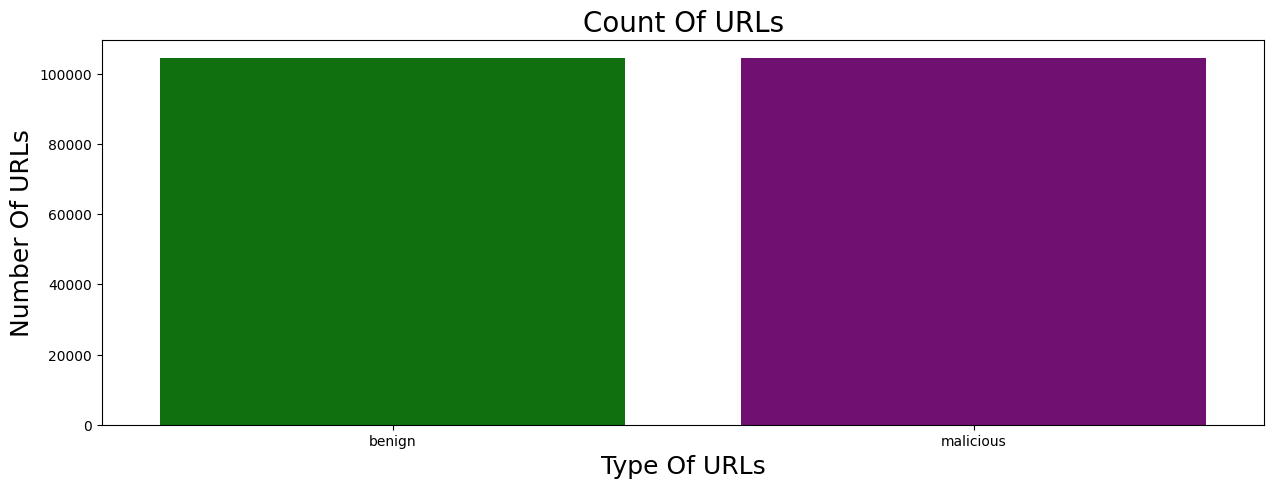

In [33]:
custom_palette = {'benign': 'green', 'malicious': 'purple'}

plt.figure(figsize=(15, 5))
sns.countplot(x='label', data=df_balanced, palette=custom_palette)
plt.title("Count Of URLs", fontsize=20)
plt.xlabel("Type Of URLs", fontsize=18)
plt.ylabel("Number Of URLs", fontsize=18)
plt.show()


In [34]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(df_balanced[df_balanced['label']=='malicious'])/len(df_balanced['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(df_balanced[df_balanced['label']=='benign'])/len(df_balanced['label'])*100))

Percent Of Malicious URLs:50.00 %
Percent Of Benign URLs:50.00 %


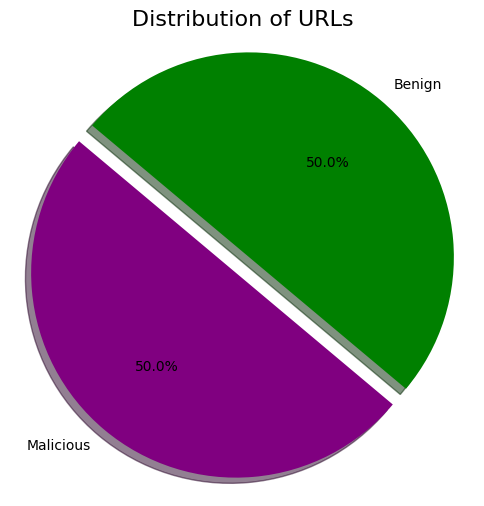

In [35]:


# Calculate the percentages
percent_malicious = len(df_balanced[df_balanced['label'] == 'malicious']) / len(df_balanced['label']) * 100
percent_benign = len(df_balanced[df_balanced['label'] == 'benign']) / len(df_balanced['label']) * 100

# Create data for the pie chart
labels = ['Malicious', 'Benign']
sizes = [percent_malicious, percent_benign]
colors = ['purple', 'green']
explode = (0.1, 0)  # Explode the first slice (Malicious)

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Distribution of URLs", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


(0.0, 1000.0)

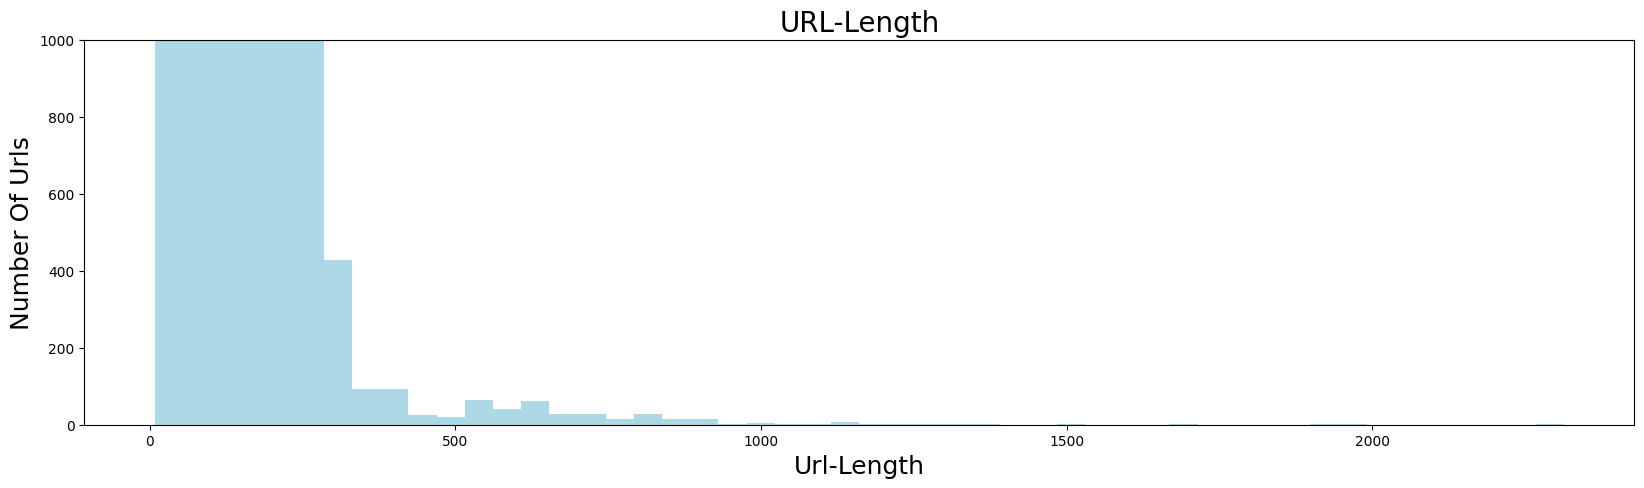

In [36]:
plt.figure(figsize=(20,5))
plt.hist(df_balanced['url_length'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

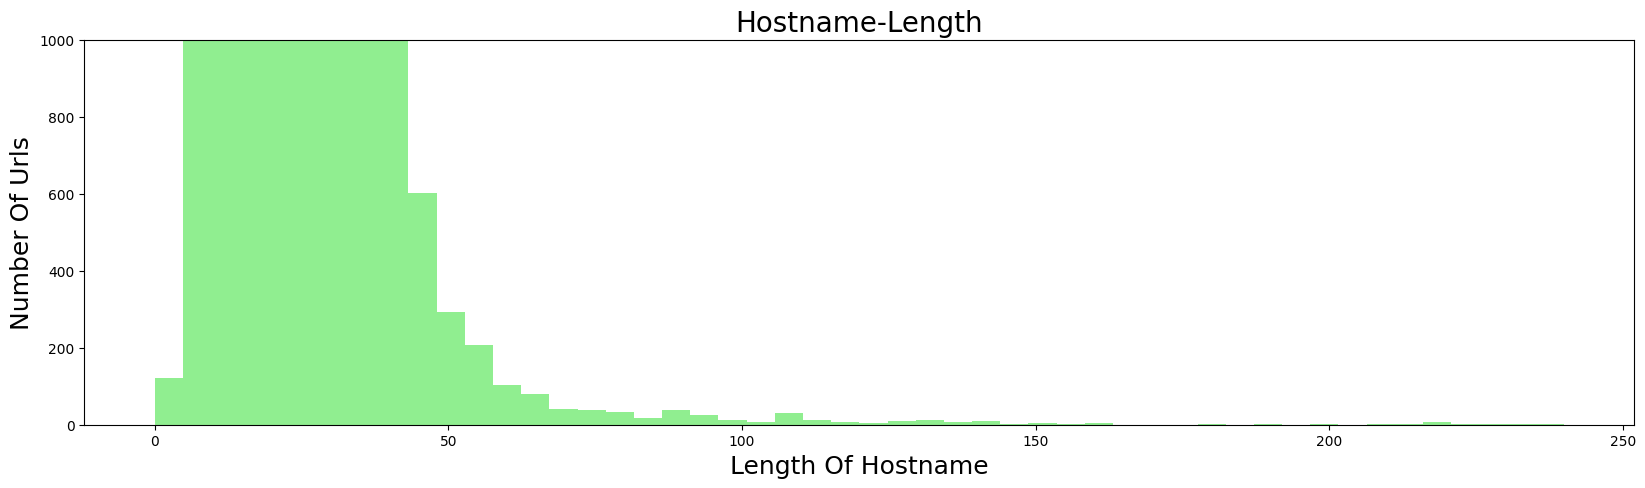

In [37]:
plt.figure(figsize=(20,5))
plt.hist(df_balanced['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

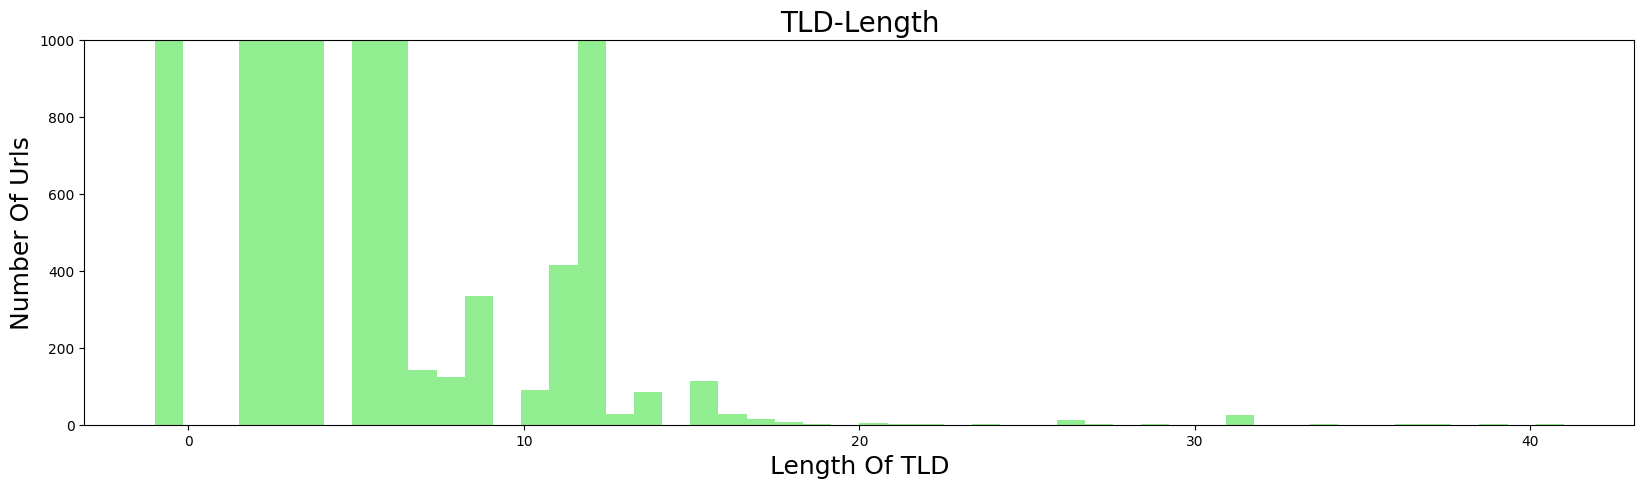

In [38]:
plt.figure(figsize=(20,5))
plt.hist(df_balanced['tld_length'],bins=50,color='Lightgreen')
plt.title("TLD-Length",fontsize=20)
plt.xlabel("Length Of TLD",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

Text(0, 0.5, 'Number Of URLs')

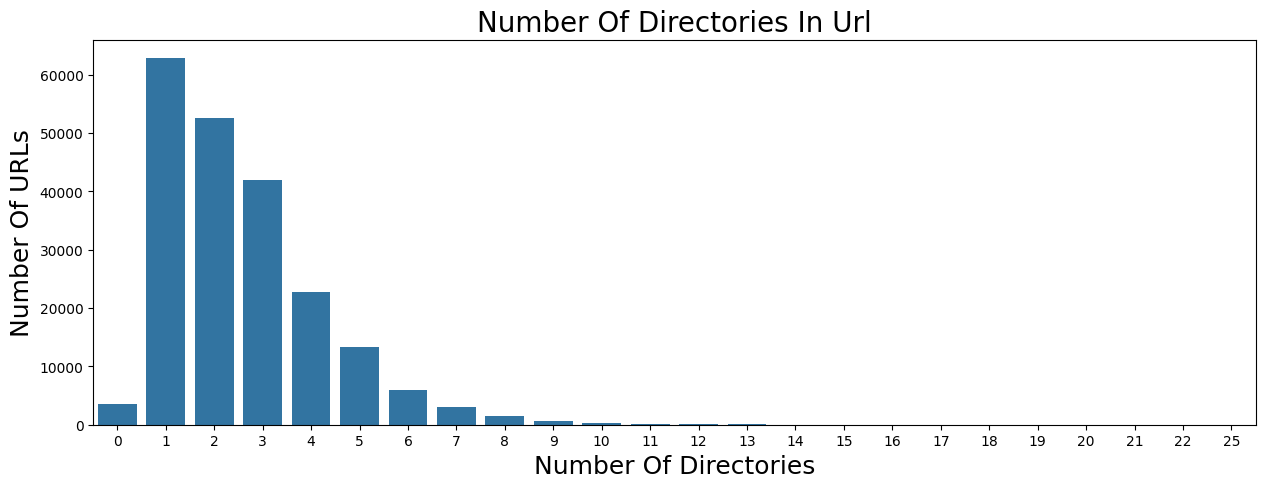

In [39]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='directory_count',data=df_balanced)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

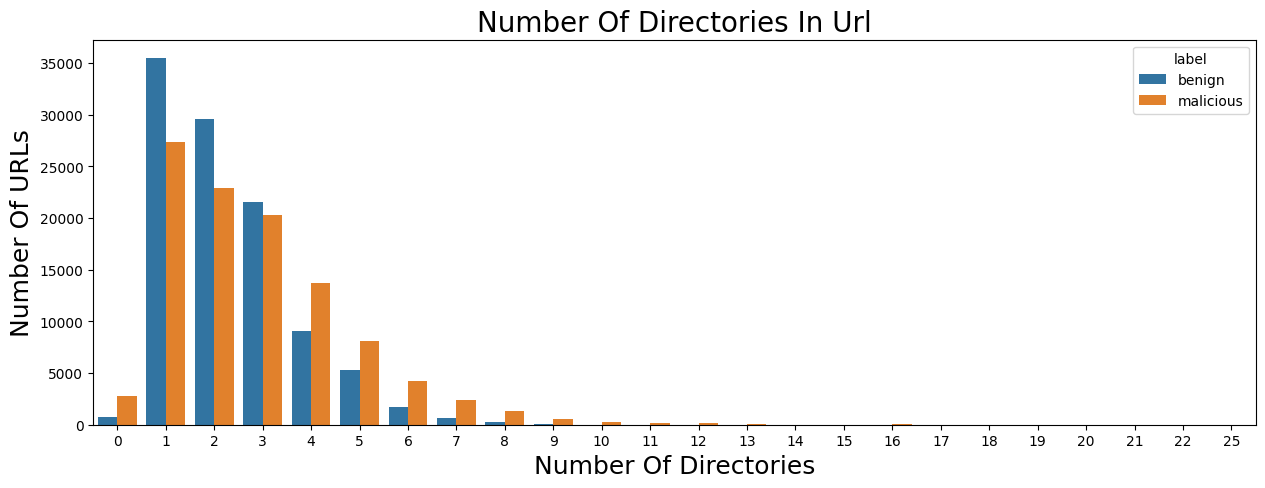

In [40]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='directory_count',data=df_balanced,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number of URLs')

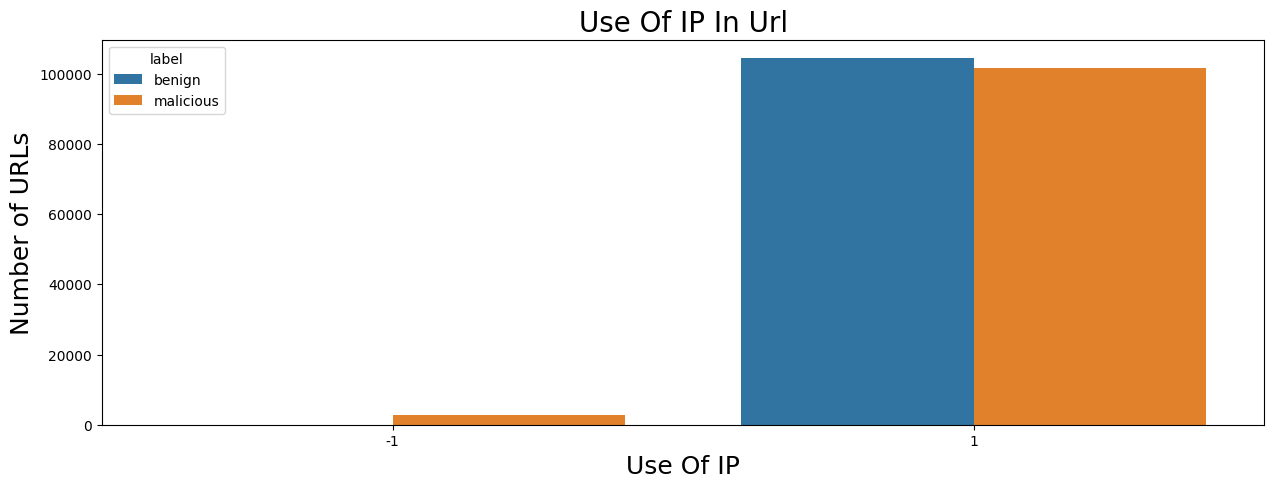

In [41]:
plt.figure(figsize=(15, 5))
plt.title("Use Of IP In Url", fontsize=20)
plt.xlabel("Use Of IP", fontsize=18)
plt.ylabel("Number of URLs", fontsize=18)
sns.countplot(x='use_of_ip', hue='label', data=df_balanced)
plt.ylabel("Number of URLs", fontsize=18)


Text(0, 0.5, 'Number of URLs')

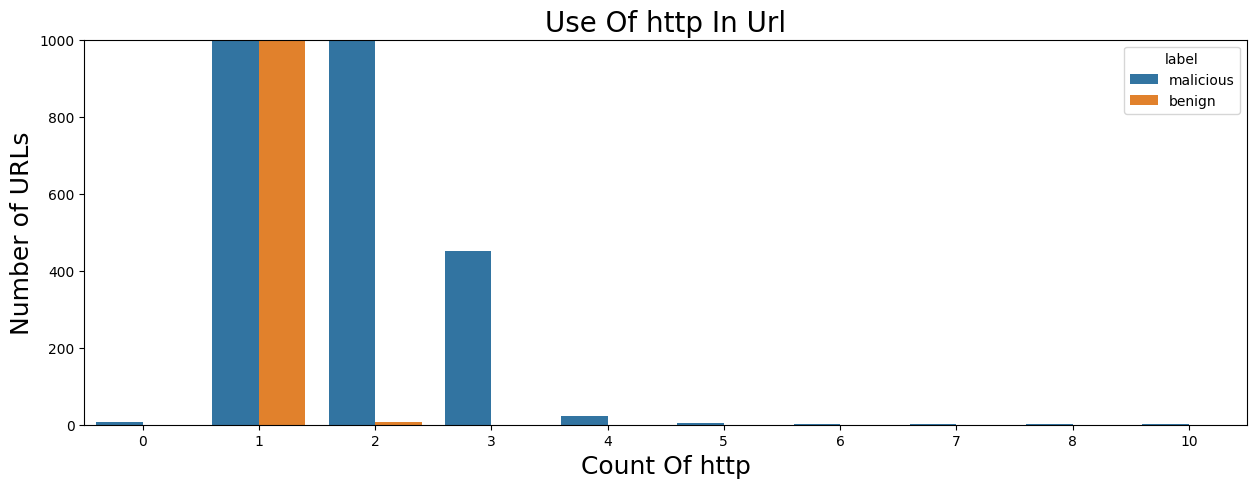

In [42]:
plt.figure(figsize=(15, 5))
plt.title("Use Of http In Url", fontsize=20)
plt.xlabel("Count Of http", fontsize=18)
plt.ylabel("Number of URLs", fontsize=18)
plt.ylim((0, 1000))
sns.countplot(x='http', hue='label', data=df_balanced)
plt.ylabel("Number of URLs", fontsize=18)


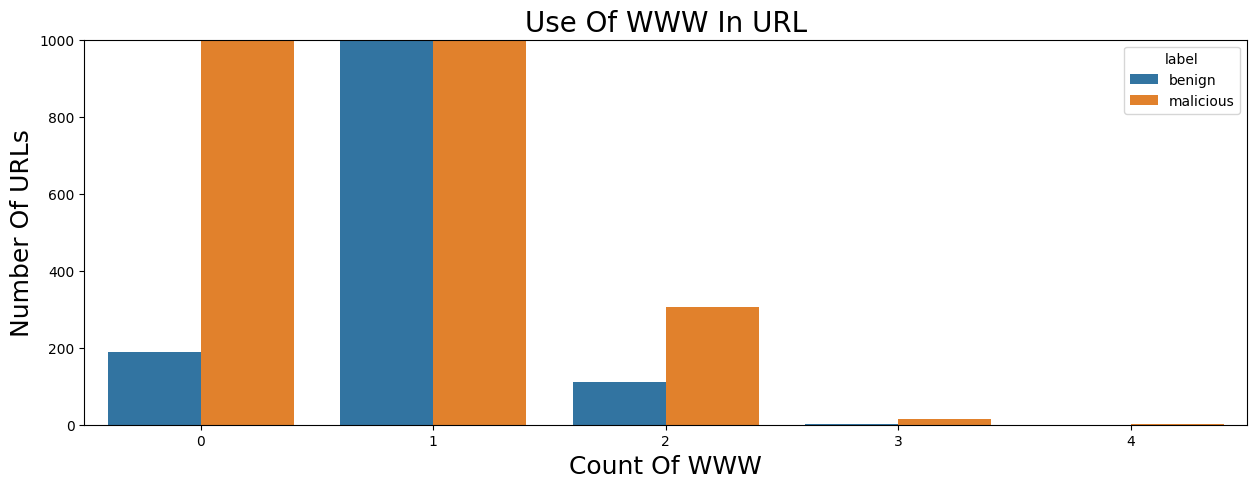

In [43]:
plt.figure(figsize=(15, 5))
plt.title("Use Of WWW In URL", fontsize=20)
plt.xlabel("Count Of WWW", fontsize=18)
plt.ylabel("Number Of URLs", fontsize=18)

plt.ylim(0, 1000)
sns.countplot(x='www', hue ='label',  data=df_balanced)
plt.show()

<Axes: title={'center': 'Use Of IP In Url'}, xlabel='Use Of IP', ylabel='Number of URLs'>

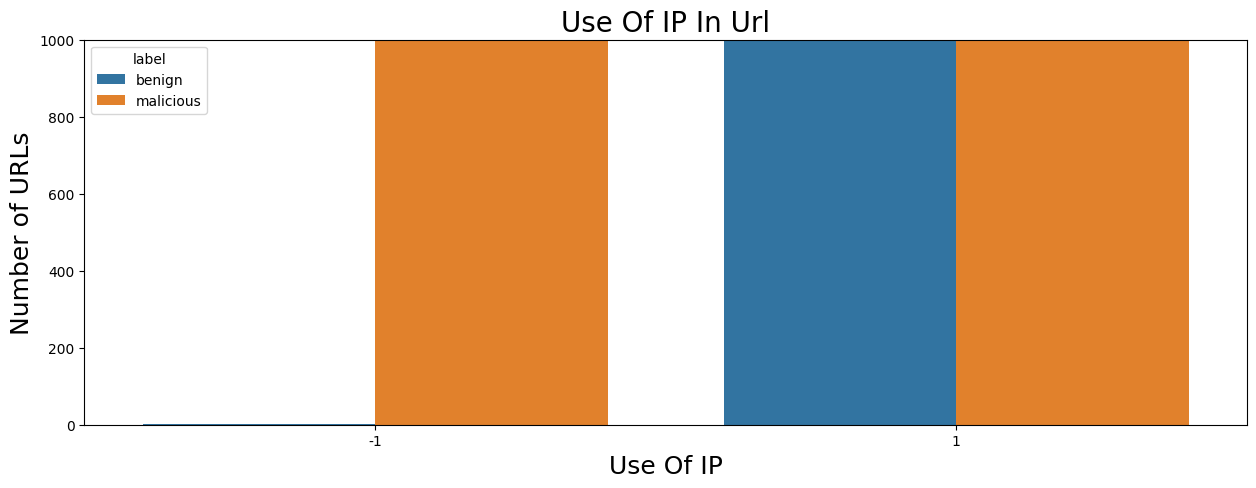

In [44]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)

plt.ylim(0,1000)
sns.countplot(x='use_of_ip', hue = 'label', data=df_balanced)

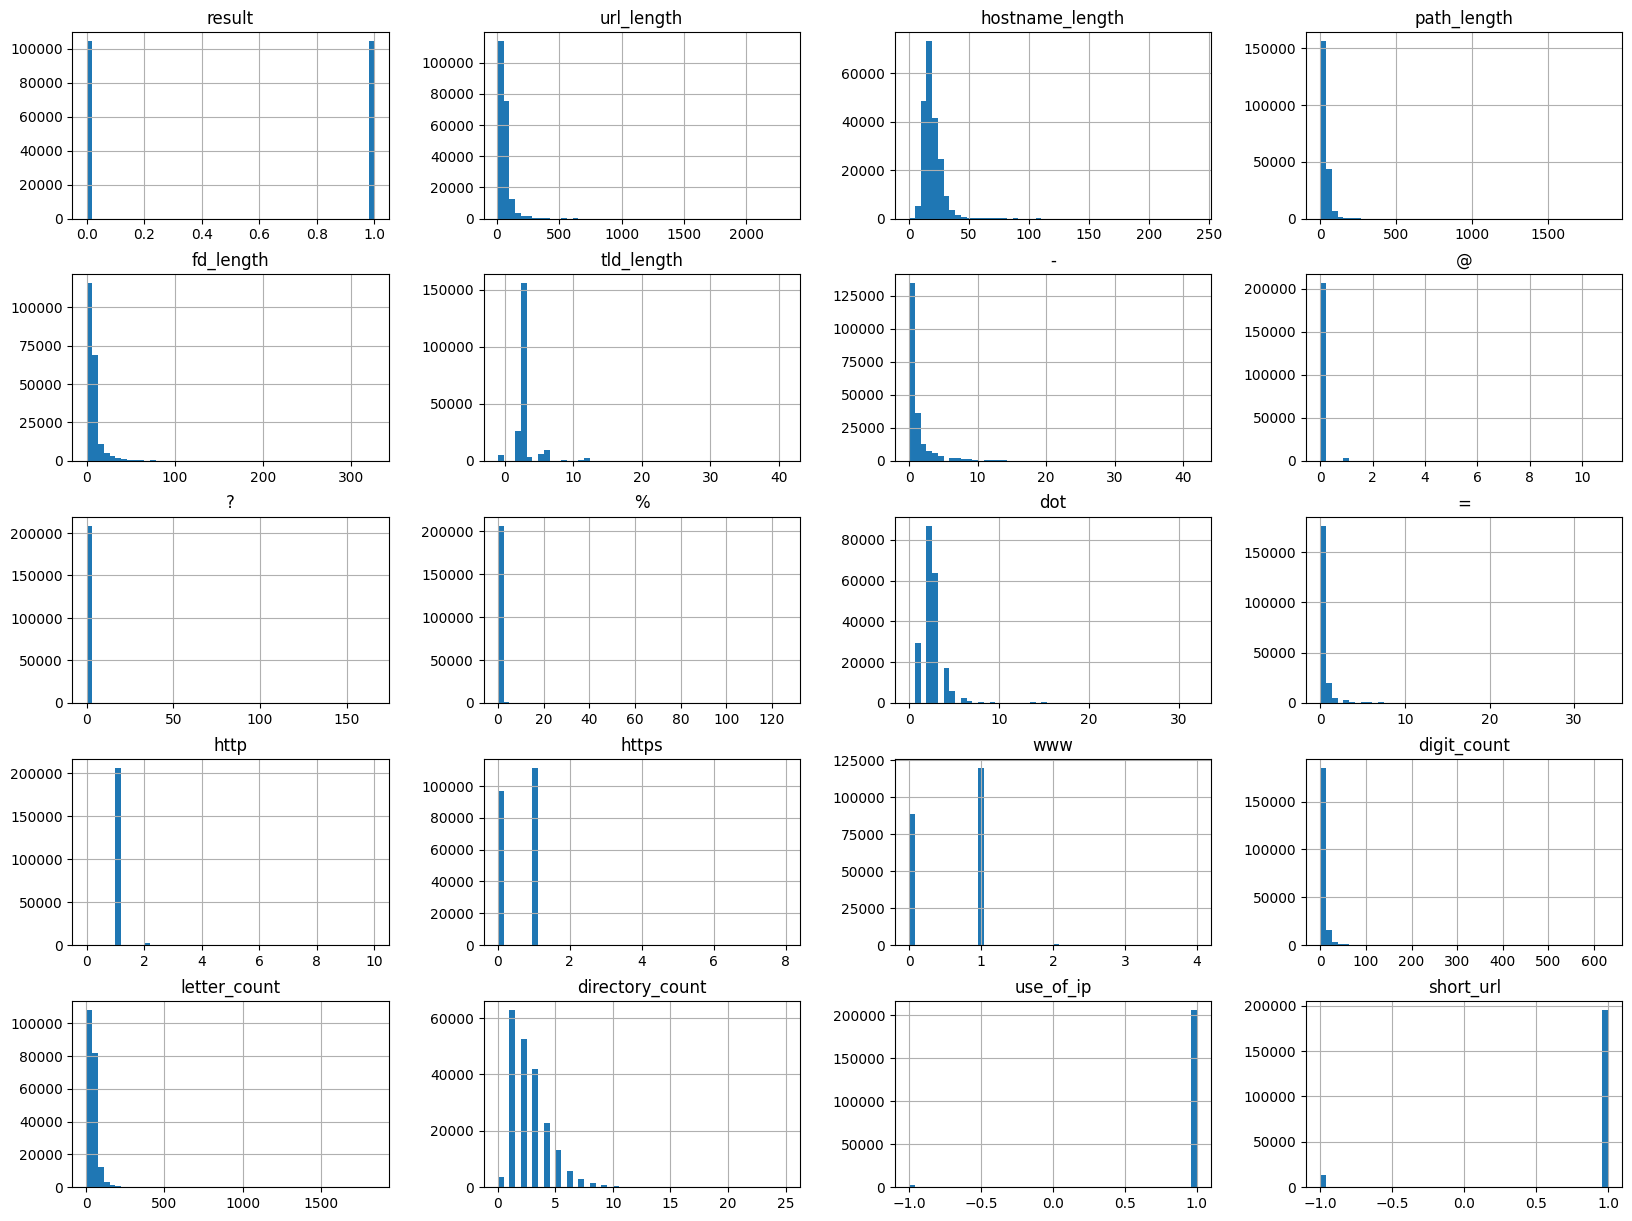

In [45]:
import matplotlib.pyplot as plt
df_balanced.hist(bins=50, figsize=(20, 15))
plt.show()

*Model Deployment using Lexical Features only*

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.tree import DecisionTreeClassifier

In [47]:
#Predictor Variables
x = df_balanced[['hostname_length',
       'path_length', 'fd_length', 'tld_length', '-', '@', '?',
       '%', 'dot', '=', 'http','https', 'www', 'digit_count',
       'letter_count', 'directory_count', 'use_of_ip']]

#Target Variable
y = df_balanced['result']

In [48]:
x.shape

(208876, 17)

In [49]:
y.shape

(208876,)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.25, random_state=42)

**decision tree**

Decision Tree Classifier
Accuracy: 0.9926399714024908
Precision: 0.9928657120249126
Recall: 0.9924224062049523
F1 Score: 0.9926440096208443


<Axes: >

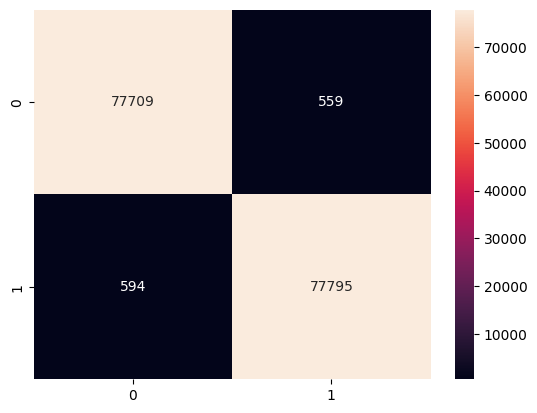

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

dt_predictions = dt_model.predict(x_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, dt_predictions)
precision = precision_score(y_test, dt_predictions)
recall = recall_score(y_test, dt_predictions)
f1 = f1_score(y_test, dt_predictions)

print("Decision Tree Classifier")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
sns.heatmap(confusion_matrix(y_test,dt_predictions),annot=True,fmt='d')


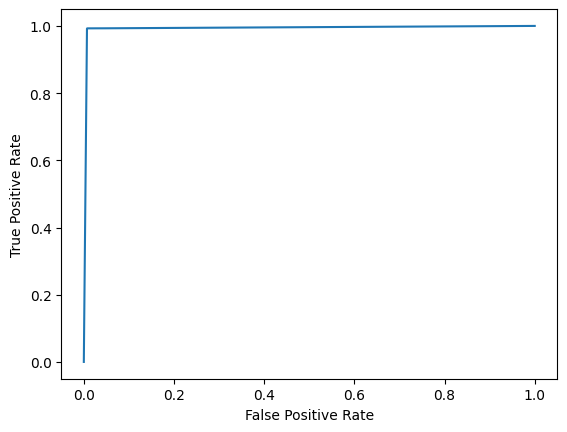

In [52]:
y_pred_proba = dt_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
print(confusion_matrix(y_test,dt_predictions))

[[77709   559]
 [  594 77795]]


Random Forest Classifier
Accuracy: 0.9954550387151547
Precision: 0.9979231035499545
Recall: 0.9929837094490298
F1 Score: 0.995447279237803


<Axes: >

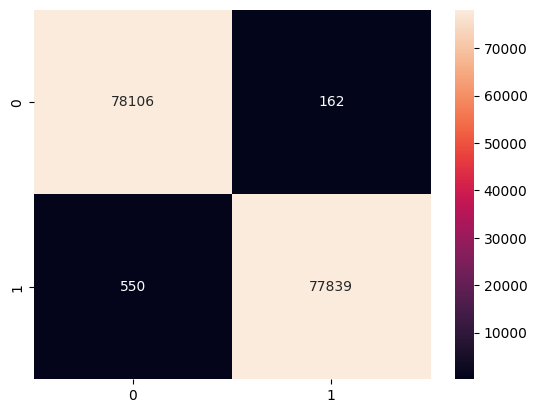

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Random Forest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_predictions = rfc.predict(x_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, rfc_predictions)
precision = precision_score(y_test, rfc_predictions)
recall = recall_score(y_test, rfc_predictions)
f1 = f1_score(y_test, rfc_predictions)

print("Random Forest Classifier")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
sns.heatmap(confusion_matrix(y_test,rfc_predictions),annot=True,fmt='d')



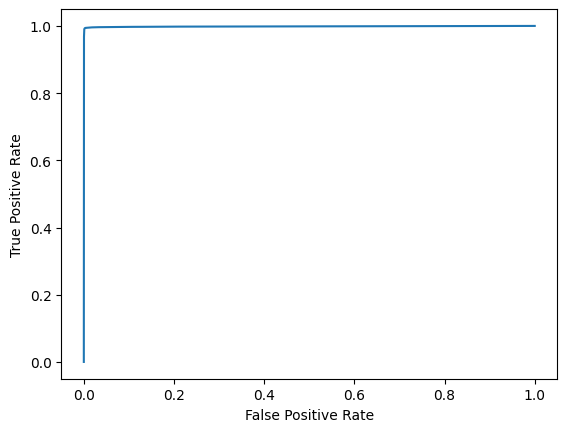

In [55]:
y_pred_proba = rfc.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
print(confusion_matrix(y_test,rfc_predictions))

[[78106   162]
 [  550 77839]]


In [57]:
Algo=[dt_model,rfc]
Scores=[]
for K in Algo:
  K.fit(x_train,y_train)
  Scores.append(K.score(x_test,y_test)*100)
Algo=["DTC","RF"]
Table=pd.DataFrame()
Table['Algorithms']=Algo
Table['Accuracy']=Scores
Table

,Algorithms,Accuracy
0,DTC,99.265912
1,RF,99.549972


<Axes: xlabel='Algorithms', ylabel='Accuracy'>

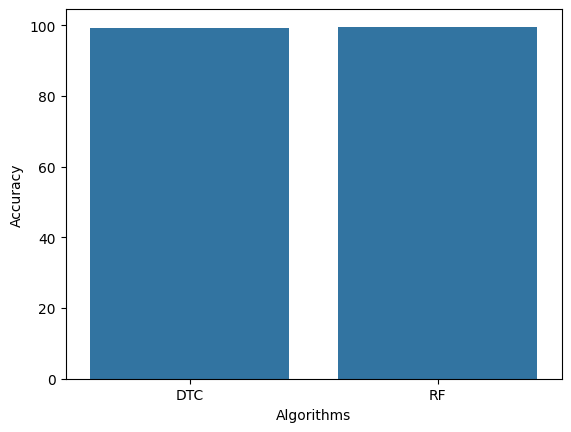

In [58]:
sns.barplot(x='Algorithms',y='Accuracy',data=Table)

In [59]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

RF = RandomForestClassifier()
Tree = DecisionTreeClassifier()

cv_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_rf = cross_val_score(RF, x_train, y_train, cv=cv_rf, scoring='accuracy')

cv_tree = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_tree = cross_val_score(Tree, x_train, y_train, cv=cv_tree, scoring='accuracy')

print("Random Forest Cross-Validation Scores:", scores_rf)
print("Decision Tree Cross-Validation Scores:", scores_tree)
print("Average Random Forest Cross-Validation Score:", scores_rf.mean())
print("Average Decision Tree Cross-Validation Score:", scores_tree.mean())


Random Forest Cross-Validation Scores: [0.99511681 0.99530831 0.99521256 0.99674454 0.99492483]
Decision Tree Cross-Validation Scores: [0.9919571  0.99166986 0.99157411 0.99348908 0.99147754]
Average Random Forest Cross-Validation Score: 0.9954614118121416
Average Decision Tree Cross-Validation Score: 0.9920335403589575


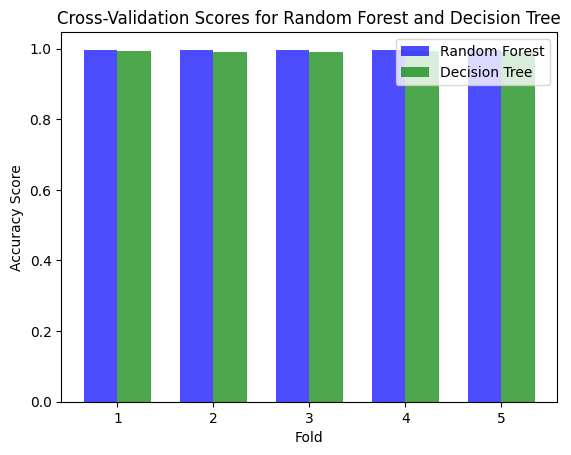

In [60]:

bar_width = 0.35
r1 = np.arange(len(scores_rf))
r2 = [x + bar_width for x in r1]

plt.bar(r1, scores_rf, width=bar_width, label='Random Forest', color='blue', alpha=0.7)
plt.bar(r2, scores_tree, width=bar_width, label='Decision Tree', color='green', alpha=0.7)


plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Scores for Random Forest and Decision Tree')
plt.xticks([r + bar_width/2 for r in range(len(scores_rf))], range(1, len(scores_rf)+1))  # Adjust x-axis labels
plt.legend()

# Show the plot
plt.show()


In [61]:
df_balanced.head()

,url,result,label,url_length,hostname_length,path_length,fd_length,tld_length,-,@,...,dot,=,http,https,www,digit_count,letter_count,directory_count,use_of_ip,short_url
328491,https://www.yelp.com/biz/stone-mountain-clay-a...,0,benign,61,12,41,3,3,5,0,...,2,0,1,1,1,0,49,2,1,1
60800,https://www.ivanhill5478.blogspot.com/,0,benign,38,29,1,0,12,0,0,...,3,0,1,1,1,4,27,1,1,-1
191230,https://www.facebook.com/people/Reggie-Walton/...,0,benign,56,16,32,6,3,1,0,...,2,0,1,1,1,10,37,3,1,1
49392,https://www.freepages.genealogy.rootsweb.ances...,0,benign,79,45,26,8,3,0,0,...,6,0,1,1,1,1,65,3,1,1
240956,https://www.manchester.edu/Athletics/basketbal...,0,benign,61,18,35,9,3,0,0,...,3,0,1,1,1,0,52,3,1,1
